In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [25]:
!pip install tensorflow==1.15

In [26]:
import numpy as np
import sklearn
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble,tree,linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier,GradientBoostingRegressor)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split,cross_val_score
# from sklearn.cross_validation import KFold
import tensorflow as tf
import warnings
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
%reload_ext autoreload
%autoreload 2
%matplotlib inline
warnings.filterwarnings('ignore')

pd.options.display.max_columns=99

In [27]:
import pandas as pd

In [28]:
# Input_Data = pd.read_csv('data/Input_interp_filledCat_codedCat.csv')
Input_Data = pd.read_csv('/content/drive/My Drive/NCI /Alzheimer/data/Input_pca_0.95thres.csv')
# Input_Data = pd.read_csv('data/Input_remove_corr.csv')
# normalize the format of EXAMDATE
Input_Data['EXAMDATE'] = pd.to_datetime(Input_Data['EXAMDATE'], errors='coerce')
Input_Data.head()
# Input_Data['EXAMDATE'].dtype

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,PTID_Key,EXAMDATE,DX
0,-0.914627,-0.601258,-1.025954,0.646074,1.011304,0.545207,0.413025,0.157753,0.240323,1.241342,-0.615188,1.990854,0.508145,0.280259,0.153665,-0.378721,1.514711,-0.018951,0.283258,-0.657084,0.221393,0.350555,0.194970,-0.604919,-1.521198,-0.186426,-1.876618,-0.210861,0.673811,-0.596824,0.631972,0.027220,0.872613,-0.775025,0.768025,-1.076237,-0.941686,0.216097,2.490700,-1.265438,-0.277575,-1.353105,-0.388595,0.506031,-0.720210,-0.811336,-0.688113,0.742395,0.775106,...,-1.038844,-1.490284,0.324352,-1.028604,-0.972160,-0.283392,-1.045164,-0.832387,0.798486,0.210059,-0.449635,-0.441003,0.469078,-1.030184,-0.778918,0.415911,0.045974,0.320170,-2.414285,1.074156,2.614145,-1.760806,0.442195,0.431864,1.393142,-1.208740,0.603962,-1.974642,-1.248105,-0.304060,-0.846221,0.430196,0.793928,0.563909,0.624450,-0.352737,0.543500,-1.487216,1.264804,0.964885,-0.080049,1.064061,1.363676,1.058938,0.272191,-0.933477,1.0,2010-12-10,2
1,-0.551758,-0.979188,-1.117844,1.076659,0.625377,0.593831,0.200446,-0.109782,0.167414,1.085336,-0.908626,0.743372,0.728976,-0.158146,0.144664,0.512072,1.800080,-0.349467,0.228156,-0.650025,0.099217,0.732545,0.032123,-0.570181,-1.853058,0.309348,-1.390368,-0.525124,0.652957,0.002733,1.022216,-0.363548,1.138629,-0.807477,0.886634,-0.933278,-0.718929,-0.177979,1.806847,-0.246725,0.201150,-0.586490,-0.034705,1.524434,-0.490066,-0.777765,-0.901842,0.590897,0.483670,...,-1.341119,-0.416505,-0.392220,-1.099246,-1.542611,0.070696,-0.996193,-0.517035,0.528102,-0.645235,-0.807709,-0.870672,0.461747,-0.857624,-0.120386,0.090665,0.774271,0.565062,-1.341261,1.797199,1.253995,-0.440612,1.865252,-0.874564,1.139276,-1.714373,0.840345,-0.453060,-2.271202,0.701802,-1.159149,0.895165,0.005705,0.684127,0.605223,-0.346341,0.567335,-1.565463,1.082742,2.051711,-0.847921,-0.770229,0.627813,1.707643,-0.733248,-0.978921,1.0,2011-04-07,2
2,-0.819737,-0.982439,-1.010676,1.049898,0.690065,0.794359,0.281527,-0.584051,0.523014,1.314751,-0.469318,1.015452,0.096584,-0.088802,0.121028,0.640031,1.196030,-0.043073,0.300539,-0.511375,0.033300,0.266959,0.285403,-0.413766,-1.852933,0.159371,-1.505815,-0.257185,1.073447,-0.129415,0.114441,-0.491802,0.351462,-1.344000,0.941796,-1.608389,-0.638489,-0.208845,1.829999,-0.354246,0.138765,-1.168997,0.140994,1.355517,0.127256,-0.306865,-0.525544,0.153632,0.098746,...,-2.057672,-0.952390,0.817166,-0.929542,-1.253907,-0.757082,0.291924,0.301991,-0.853896,-0.014121,0.717416,0.330790,0.103781,-1.087737,0.104273,0.362352,-0.402443,0.103485,-1.247700,-0.150378,0.798621,-0.397531,1.220346,0.753486,0.668390,-0.309202,0.647125,-1.383107,-1.227107,-0.569572,-1.262420,-0.608105,0.859759,0.112846,1.038929,0.008226,0.399049,-0.651663,1.558614,0.498691,-0.013602,0.577223,0.193071,0.872848,0.810032,0.567605,1.0,2011-09-08,2
3,-1.336536,0.124959,0.264916,0.702107,-0.807134,0.915510,-0.873423,0.532419,-1.443437,0.450801,-0.561760,-0.045759,0.460943,-0.131770,0.077856,-0.862233,0.352317,-0.057771,-0.283949,-2.005893,-0.729035,-0.121274,0.386319,-0.724438,-0.163793,-0.482719,-0.054568,1.137994,-0.664942,-0.086511,0.020414,-0.143499,0.533670,-0.036038,0.685906,0.058562,-0.216113,-0.077563,0.045318,-0.706913,0.171094,0.184283,0.373552,-0.751905,0.778222,0.892420,-0.362174,-1.056220,0.453497,...,0.744001,-0.413096,-1.867010,-0.117463,-0.523031,1.244548,1.058056,-1.018938,0.014747,-0.899172,0.492322,0.230810,-0.515261,1.091011,-1.302503,-0.515504,-0.167311,-0.036739,0.137325,1.672527,-0.373430,-0.763381,0.547022,-0.613933,1.174471,-1.530746,-0.011245,-0.899292,0.415859,-0.510134,-0.333156,0.464144,1.131625,1.781166,-0.871261,0.403435,-0.576608,0.418030,2.221819,1.403739,0.146228,0.523462,-1.100993,0

In [29]:
Input_Data.shape

(8715, 281)

### training target

In [30]:
# Do linear interpolation if there is data before and after for the same object, then do ffil and bfil
def linear_interp(data):
    ID_list = np.unique(data.PTID_Key.values)
    # Create an empty dataframe with all columns from data
    Input_new=pd.DataFrame(columns=data.columns)
#     print(ID_list)
    for ID in ID_list:
#         print(ID)
        df=data[data['PTID_Key']==ID]
        # interpolate only for numeric data
        df=df.interpolate()
        # ffill, bfill numeric data that can't be interpolate as well as categorical data
        df=df.fillna(method='ffill')
        df=df.fillna(method='bfill')
        Input_new=pd.concat([Input_new, df], ignore_index=True)

    print("Remaining missing values: ", Input_new.isnull().sum().sum() )
    print("Filled percentage: ", (1- Input_new.isnull().sum().sum()/data.isnull().sum().sum())*100,"%")
    return Input_new

In [31]:
from sklearn.preprocessing import StandardScaler
def scale(data):
#     df=pd.DataFrame(columns=data.columns)
#     print(df.shape)
#     df=data.drop(['PTID_Key','EXAMDATE', 'EXAMDATE_bl'], axis=1)
    features=data.select_dtypes(exclude=["datetime"]).columns.tolist()
    # Separating out the features
    for feature in features:
    # Standardizing the features
#         print(feature)
        data[feature] = StandardScaler().fit_transform(data[feature].values.reshape(-1,1))
    # df = StandardScaler().fit_transform(df)
    return data
    # df.isnull().sum().sum()

In [32]:
# Get the date format, check if there are objects in output but not in input, sort by PTID and date, then linear interpolate
def output_prep(data):    
    
#     data.rename(index=str,columns={'Date':'EXAMDATE'},inplace=True)
    # normalize the format of EXAMDATE
    data['Date'] = pd.to_datetime(data['Date'])
    data.head()
    
    # We can see if there is objects in data but not in df_data
    data_id = list(set(data['PTID_Key'].values))
    IDlist=[]
    for ID in data_id:
        if ID not in Input_Data['PTID_Key'].values:
            IDlist.append(ID)
    if len(IDlist)==0:
        print("All objects in the train target file are in input data file")
    else:
        print("% objects in the train target file are not in input data file:" % (len(IDlist)),IDlist)

    # sort the data by DX_bl and Month, then fill the missing data
    data = data.sort_values(by=['PTID_Key','Date'])
    data = data.reset_index(drop=True)

    data_new=linear_interp(data)
    
    # Drop the rows where at least one element is missing.
    data_new=data_new.dropna()
    data_new = data_new.reset_index(drop=True)
    print("After dropping missing values, the shape of the dataset is: ", data_new.shape)
    print("After dropping missing values, the total number of missing values is: ", data_new.isnull().sum().sum())
#     print(data_new.head())
    return data_new

In [33]:
# Get the input and output data for feeding models: cross-product, remove PTID & date, then scale data
def prep_for_models(Input,Output):
#     Input=scale(Input)
    # Cross-product (based on same PTID) the input (M rows) and output files (N rows) to get the data (MxN) for models
    data=Input.merge(Output, left_on='PTID_Key', right_on='PTID_Key')
    print("After merging input and output, the shape of the data is: ",data.shape)
    
    # Get the month between each input and each output
    data['Month_inter']=np.ceil((data['Date']-data['EXAMDATE'])/np.timedelta64(1, 'M'))
    print("Adding the month interval, the shape of the data is: ",data.shape)
    # Scale numeric data
    data = data.drop("PTID_Key", axis=1) 
    data=data.select_dtypes(exclude=['object','datetime'])
    print("Removing PTID_Key and Date columns, the shape of the data is: ",data.shape) 
    
#     print(data_input.head())
    
    return data

In [34]:
train = pd.read_csv('/content/drive/My Drive/NCI /Alzheimer/data/TADPOLE_TargetData_train.csv')
train.head()

,Date,PTID_Key,CN_Diag,MCI_Diag,AD_Diag,ADAS13,Ventricles_Norm,MMSE
0,7/10/13,785,0.0,1.0,0.0,5.0,0.012737,28.0
1,1/15/13,785,NaN,NaN,NaN,NaN,NaN,NaN
2,1/17/14,785,NaN,NaN,NaN,NaN,NaN,NaN
3,7/29/14,785,1.0,0.0,0.0,7.0,NaN,30.0
4,7/24/15,785,1.0,0.0,0.0,11.0,0.013934,25.0


In [35]:
train.shape

(2506, 8)

In [36]:
val=pd.read_csv('/content/drive/My Drive/NCI /Alzheimer/data/TADPOLE_TargetData_validation.csv')
val.head()

,Date,PTID_Key,CN_Diag,MCI_Diag,AD_Diag,ADAS13,Ventricles_Norm,MMSE
0,2014-01-02,1603,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-15,1603,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-10-29,1603,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-11,1603,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-18,1603,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
test=pd.read_csv('/content/drive/My Drive/NCI /Alzheimer/data/TADPOLE_PredictTargetData_test.csv')
test.head()

,Date,PTID_Key,CN_Diag,MCI_Diag,AD_Diag,ADAS13,Ventricles_Norm,MMSE
0,1/25/13,583,NaN,NaN,NaN,NaN,NaN,NaN
1,6/25/13,583,NaN,NaN,NaN,NaN,NaN,NaN
2,3/10/14,583,NaN,NaN,NaN,NaN,NaN,NaN
3,12/4/13,809,NaN,NaN,NaN,NaN,NaN,NaN
4,4/25/13,809,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
Input_Data['EXAMDATE'].dtype
#train_proc['Date'].dtype
#train_proc.head()

dtype('<M8[ns]')

In [39]:
# Prepare training data
train_proc=output_prep(train)
train_proc.to_csv('/content/drive/My Drive/NCI /Alzheimer/data/train_preprocessed.csv',index=False)

# Prepare validation data
val_proc=output_prep(val)
val_proc.to_csv('/content/drive/My Drive/NCI /Alzheimer/data/val_preprocessed.csv',index=False)


All objects in the train target file are in input data file
Remaining missing values:  1037
Filled percentage:  82.67624457066488 %
After dropping missing values, the shape of the dataset is:  (1901, 8)
After dropping missing values, the total number of missing values is:  0
All objects in the train target file are in input data file
Remaining missing values:  408
Filled percentage:  80.17492711370262 %
After dropping missing values, the shape of the dataset is:  (639, 8)
After dropping missing values, the total number of missing values is:  0


In [40]:
# Get x,y for training data
data_con = ['ADAS13','Ventricles_Norm','MMSE']
data_cat=['CN_Diag','MCI_Diag','AD_Diag']

train_final=prep_for_models(Input_Data,train_proc)

x_train=train_final.drop(data_con,axis=1).drop(data_cat,axis=1)

y_train_adas13=train_final['ADAS13']
y_train_ventricles=train_final['Ventricles_Norm']
y_train_mmse=train_final['MMSE']

# Diagnosis
y_train_diag = train_final[['CN_Diag','MCI_Diag','AD_Diag']]

y_train_diag['CN_Diag'] = y_train_diag['CN_Diag'].astype('int')
y_train_diag['MCI_Diag'] = y_train_diag['MCI_Diag'].astype('int')
y_train_diag['AD_Diag'] = y_train_diag['AD_Diag'].astype('int')

# Encode one-hot encoding back to label encoding (0: CN_Diag, 1: MCI_Diag, 2: AD_Diag)
y_train_diag['Diag'] = np.argmax(y_train_diag[['CN_Diag','MCI_Diag','AD_Diag']].values,axis=1)

y_train_diag1 = y_train_diag['Diag']
y_train_diag2 = y_train_diag[['CN_Diag','MCI_Diag','AD_Diag']]


After merging input and output, the shape of the data is:  (6716, 288)
Adding the month interval, the shape of the data is:  (6716, 289)
Removing PTID_Key and Date columns, the shape of the data is:  (6716, 286)


In [41]:
# Get x,y for validation data
data_con = ['ADAS13','Ventricles_Norm','MMSE']
data_cat=['CN_Diag','MCI_Diag','AD_Diag']

val_final=prep_for_models(Input_Data,val_proc)

x_val=val_final.drop(data_con,axis=1).drop(data_cat,axis=1)

y_val_adas13=val_final['ADAS13']
y_val_ventricles=val_final['Ventricles_Norm']
y_val_mmse=val_final['MMSE']

# Diagnosis
y_val_diag = val_final[['CN_Diag','MCI_Diag','AD_Diag']]

y_val_diag['CN_Diag'] = y_val_diag['CN_Diag'].astype('int')
y_val_diag['MCI_Diag'] = y_val_diag['MCI_Diag'].astype('int')
y_val_diag['AD_Diag'] = y_val_diag['AD_Diag'].astype('int')

# Encode one-hot encoding back to label encoding (0: CN_Diag, 1: MCI_Diag, 2: AD_Diag)
y_val_diag['Diag'] = np.argmax(y_val_diag[['CN_Diag','MCI_Diag','AD_Diag']].values,axis=1)

y_val_diag1 = y_val_diag['Diag']
y_val_diag2 = y_val_diag[['CN_Diag','MCI_Diag','AD_Diag']]


After merging input and output, the shape of the data is:  (2238, 288)
Adding the month interval, the shape of the data is:  (2238, 289)
Removing PTID_Key and Date columns, the shape of the data is:  (2238, 286)


## Machine Learning Models

In [42]:
### Models

from sklearn import ensemble,tree,linear_model
from sklearn.metrics import r2_score, mean_squared_error

# Print R2 and RMSE scores
def get_score(prediction, labels):
    print('R2: {}'.format(r2_score(prediction, labels)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction,labels))))

In [43]:
# Show scores for train and validation sets
def train_test(estimator, x_train, x_test, y_train, y_test):
    prediction_train = estimator.predict(x_train)
    print(estimator)
    get_score(prediction_train,y_train)
    
    prediction_test = estimator.predict(x_test)
    print('Test')
    get_score(prediction_test, y_test)

###Elastic Net Regressor

In [44]:
# Elastic Net
def eNet(x_train,y_train,x_val,y_val):
    ENSTest = linear_model.ElasticNetCV(alphas=[  ],l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(x_train,y_train)
    train_test(ENSTest, x_train,x_val,y_train,y_val)

    # Average R2 score and standard deviation of 5-fold cross-validation
    scores = cross_val_score(ENSTest, x_train, y_train, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

In [45]:
print("ADAS13")
eNet(x_train,y_train_adas13,x_val,y_val_adas13)
print("Ventricles_Norm")
eNet(x_train,y_train_ventricles,x_val,y_val_ventricles)
print("MMSE")
eNet(x_train,y_train_mmse,x_val,y_val_mmse)

ADAS13
ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
             cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
             n_jobs=None, normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.7637561972169721
RMSE: 4.761452397771426
Test
R2: 0.1272502499490319
RMSE: 7.763820055598533
Accuracy: 0.58 (+/- 0.22)
Ventricles_Norm
ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
             cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
             n_jobs=None, normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.9450985570370511
RMSE: 0.002630125951292067
Test
R2: 0.8349707159800148
RMSE: 0.00473296995855007
Accuracy: 0.80 (+/- 0.07

###Support Vector Regressors

In [46]:
def svr(x_train,y_train,x_val,y_val):    
    svr = SVR(gamma='scale',C=1.0,epsilon=0.2).fit(x_train,y_train)
    train_test(svr, x_train,x_val,y_train,y_val)

    # Average R2 score and standard deviation of 5-fold cross-validation
    scores = cross_val_score(svr, x_train, y_train, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

In [47]:
print("ADAS13")
svr(x_train,y_train_adas13,x_val,y_val_adas13)
print("Ventricles_Norm")
svr(x_train,y_train_ventricles,x_val,y_val_ventricles)
print("MMSE")
svr(x_train,y_train_mmse,x_val,y_val_mmse)

ADAS13
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2: -3.2291382038888186
RMSE: 8.860751651893896
Test
R2: -13.462647793908443
RMSE: 10.635230819009879
Accuracy: 0.14 (+/- 0.06)
Ventricles_Norm
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2: -7.747377135104545e+30
RMSE: 0.019313794043997957
Test
R2: 0.0
RMSE: 0.019544580340634176
Accuracy: -1.82 (+/- 2.10)
MMSE
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2: -0.33872547044090706
RMSE: 2.4399140180309162
Test
R2: -3.6935750303711927
RMSE: 3.137229627277827
Accuracy: 0.20 (+/- 0.09)


###Gradient Boosting for regression

In [48]:
# Gradient Boosting
def gBoost(x_train,y_train,x_val,y_val):
    GBest = ensemble.GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=3,max_features='sqrt',
                                              min_samples_leaf=15,min_samples_split=10,loss='huber').fit(x_train,y_train)
    train_test(GBest,x_train,x_train,y_train,y_train)
    # Average R2 score and standard deviation of 5-fold cross-validation
    scores = cross_val_score(GBest, x_train, y_train, cv=5)
    print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

    x_train.head()

In [49]:
print("ADAS13")
gBoost(x_train,y_train_adas13,x_val,y_val_adas13)
print("Ventricles_Norm")
gBoost(x_train,y_train_ventricles,x_val,y_val_ventricles)
print("MMSE")
gBoost(x_train,y_train_mmse,x_val,y_val_mmse)

ADAS13
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
R2: 0.9170328741202223
RMSE: 3.1142842654619143
Test
R2: 0.9170328741202223
RMSE: 3.1142842654619143
Accuracy: 0.50 (+/- 0.09)
Ventricles_Norm
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          

###Neural Network for regression

In [64]:
#### Neural networks


def random_batch(x_train, y_train, batch_size):
    
    num = x_train.shape[0]

    # Create a random index.
    idx = np.random.choice(num,
                           size=batch_size,
                           replace=False)

    # Use the random index to select random images and labels.
    x_batch = x_train[idx]
    y_batch = y_train[idx]

    return x_batch, y_batch

In [70]:
def NN(x_train,y_train,x_val,y_val):
    # Convert y_train shape to ?x1
    y_train = y_train.values.reshape(-1,1)
    y_val = y_val.values.reshape(-1,1)

    n_input = x_train.shape[1]
    n_hidden1 = 128
    n_hidden2 = 512
    n_hidden3 = 1024
    n_output = 1
    learning_rate = 0.001
    epochs = 200
    batch_size = 25
    REGULARIZATION_RATE = 0.0001

    X = tf.compat.v1.placeholder(tf.float32,[None,n_input])
    y_gt = tf.compat.v1.placeholder(tf.float32,[None,n_output])


    initializer = tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False)
    W1 = tf.Variable(initializer([n_input,n_hidden1]))
    b1 = tf.Variable(tf.constant(0.1,shape=[n_hidden1]))
    H1 = tf.nn.relu(tf.matmul(X,W1)+b1)

    W2 = tf.Variable(initializer([n_hidden1,n_hidden2]))
    b2 = tf.Variable(tf.constant(0.1,shape=[n_hidden2]))
    H2 = tf.nn.relu(tf.matmul(H1,W2)+b2)

    W3 = tf.Variable(initializer([n_hidden2,n_hidden3]))
    b3 = tf.Variable(tf.constant(0.1,shape=[n_hidden3]))
    H3 = tf.nn.relu(tf.matmul(H2,W3)+b3)

    W_out = tf.Variable(initializer([n_hidden3,n_output]))
    b_out = tf.Variable(tf.constant(0.1,shape=[n_output]))
    y_pred = tf.matmul(H3,W_out)+b_out

    tr_losses=[]
    te_losses=[]
    loss = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_gt,predictions=y_pred)) 
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_step = optimizer.minimize(loss)

    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    for iter in range(epochs):

        sess.run(train_step, feed_dict={X:x_train, y_gt:y_train})
        if iter%1 == 0:
            train_loss = sess.run(loss, feed_dict={X:x_train, y_gt:y_train})
            validation_loss = sess.run(loss, feed_dict={X:x_val, y_gt:y_val})
            print("Iter %d, training loss %f, validation loss %f" % (iter, train_loss, validation_loss))
            tr_losses.append(train_loss)
            te_losses.append(validation_loss)
    train_pred = sess.run(y_pred,feed_dict={X:x_train})
    val_pred =sess.run(y_pred, feed_dict={X:x_val})
    print("Size of the model predictions for training is: ", train_pred.shape)
    print("Size of the model predictions for validation is: ", val_pred.shape)
    return train_pred, val_pred, tr_losses, te_losses

In [71]:
def plot_NN(epochs, tr_losses,te_losses):
    import matplotlib.pyplot as plt
    import math
    epoch=list(range(1,epochs+1))
    plt.figure()
    tr_loss=[math.sqrt(x) for x in tr_losses]
    te_loss=[math.sqrt(x) for x in te_losses]
    
    plt.plot(epoch,tr_losses, label='training loss')
    plt.plot(epoch,te_losses,label='validation loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
    return tr_loss, te_loss

In [72]:
import tensorflow as tf
print(tf.__version__)


1.15.0


In [75]:
epochs=200
print("ADAS13")
adas_train_pred, adas_val_pred, tr_losses, te_losses=NN(x_train,y_train_adas13,x_val,y_val_adas13)

ADAS13
Iter 0, training loss 293.817322, validation loss 257.581055
Iter 1, training loss 230.372101, validation loss 205.371033
Iter 2, training loss 140.966278, validation loss 140.904816
Iter 3, training loss 148.564850, validation loss 169.345581
Iter 4, training loss 165.376846, validation loss 195.805649
Iter 5, training loss 139.310654, validation loss 168.944901
Iter 6, training loss 109.964821, validation loss 132.728699
Iter 7, training loss 124.560120, validation loss 139.680145
Iter 8, training loss 128.017563, validation loss 145.458374
Iter 9, training loss 104.942329, validation loss 131.319138
Iter 10, training loss 91.143593, validation loss 128.233871
Iter 11, training loss 93.180046, validation loss 139.248230
Iter 12, training loss 93.741348, validation loss 145.283707
Iter 13, training loss 84.053024, validation loss 137.366959
Iter 14, training loss 71.465286, validation loss 123.775780
Iter 15, training loss 66.601761, validation loss 116.710899
Iter 16, training

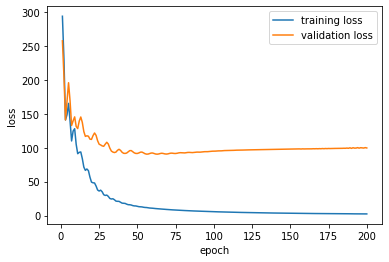

Best epoch number is:  62
The lowest validation loss is:  9.511844679607862
At the same epoch, the training loss is:  3.1821937525160604


In [76]:
tr_loss, te_loss=plot_NN(epochs, tr_losses, te_losses)
print("Best epoch number is: ", te_loss.index(min(te_loss)))
print("The lowest validation loss is: ", min(te_loss))
print("At the same epoch, the training loss is: ", tr_loss[te_loss.index(min(te_loss))])

In [77]:
print("Ventricles_Norm")
ventricles_train_pred, ventricles_val_pred, tr_losses, te_losses=ventricles_pred=NN(x_train,y_train_ventricles,x_val,y_val_ventricles)


Ventricles_Norm
Iter 0, training loss 255.889114, validation loss 252.257202
Iter 1, training loss 21.185781, validation loss 20.388475
Iter 2, training loss 41.053009, validation loss 41.995728
Iter 3, training loss 109.962128, validation loss 111.742432
Iter 4, training loss 82.858818, validation loss 84.567451
Iter 5, training loss 28.870678, validation loss 29.870518
Iter 6, training loss 1.667230, validation loss 1.932180
Iter 7, training loss 7.307764, validation loss 7.250786
Iter 8, training loss 25.843697, validation loss 25.845741
Iter 9, training loss 36.873428, validation loss 37.030052
Iter 10, training loss 33.628742, validation loss 33.858173
Iter 11, training loss 21.230574, validation loss 21.404318
Iter 12, training loss 8.386953, validation loss 8.457646
Iter 13, training loss 1.200825, validation loss 1.251557
Iter 14, training loss 1.081386, validation loss 1.251626
Iter 15, training loss 5.596549, validation loss 5.991350
Iter 16, training loss 10.778072, validati

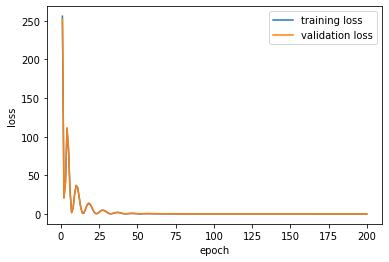

Best epoch number is:  199
The lowest validation loss is:  0.34599860543317285
At the same epoch, the training loss is:  0.11686281285391474


In [78]:
epochs=200
tr_loss, te_loss=plot_NN(epochs, tr_losses, te_losses)
print("Best epoch number is: ", te_loss.index(min(te_loss)))
print("The lowest validation loss is: ", min(te_loss))
print("At the same epoch, the training loss is: ", tr_loss[te_loss.index(min(te_loss))])

In [79]:
print("MMSE")
mmse_train_pred, mmse_val_pred, tr_losses, te_losses=NN(x_train,y_train_mmse,x_val,y_val_mmse)


MMSE
Iter 0, training loss 201.368759, validation loss 201.463226
Iter 1, training loss 236.445618, validation loss 242.682083
Iter 2, training loss 298.875641, validation loss 309.268311
Iter 3, training loss 219.214691, validation loss 230.948700
Iter 4, training loss 124.478279, validation loss 134.715302
Iter 5, training loss 74.982796, validation loss 82.338074
Iter 6, training loss 64.825340, validation loss 69.583763
Iter 7, training loss 68.310013, validation loss 71.587006
Iter 8, training loss 66.691483, validation loss 69.619141
Iter 9, training loss 56.755756, validation loss 60.044266
Iter 10, training loss 47.996151, validation loss 52.145168
Iter 11, training loss 50.164635, validation loss 55.646175
Iter 12, training loss 53.880840, validation loss 60.989750
Iter 13, training loss 45.377167, validation loss 54.074478
Iter 14, training loss 32.856354, validation loss 42.843212
Iter 15, training loss 26.688602, validation loss 37.615650
Iter 16, training loss 26.498976, v

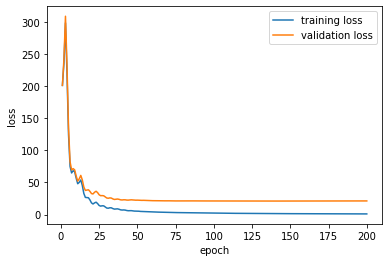

Best epoch number is:  132
The lowest validation loss is:  4.580642997216039
At the same epoch, the training loss is:  1.2337763336525054


In [80]:
tr_loss, te_loss=plot_NN(epochs, tr_losses, te_losses)
print("Best epoch number is: ", te_loss.index(min(te_loss)))
print("The lowest validation loss is: ", min(te_loss))
print("At the same epoch, the training loss is: ", tr_loss[te_loss.index(min(te_loss))])

# Classification

In [81]:
x_train_diag=x_train
x_val_diag=x_val

# Append the predicted numerical variables (ADAS13, Ventricles_Norm, MMSE) as new features for diagnosis predictions
x_train_diag['ADAS13']=adas_train_pred
x_train_diag['Ventricles_Norm']=ventricles_train_pred
x_train_diag['MMSE']=mmse_train_pred

y_train_diag = y_train_diag1.values.reshape(-1,1)

# Same for validation data
x_val_diag['ADAS13']=adas_val_pred
x_val_diag['Ventricles_Norm']=ventricles_val_pred
x_val_diag['MMSE']=mmse_val_pred

y_val_diag = y_val_diag1.values.reshape(-1,1)

In [82]:
def transform(y_val,predictions):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    y_val_cls = ohe.fit_transform(y_val.reshape(-1,1)).toarray()

    predictions_cls = ohe.fit_transform(predictions.reshape(-1,1)).toarray()
    cn_cls = y_val_cls[:,0]
    mci_cls = y_val_cls[:,1]
    ad_cls = y_val_cls[:,2]

    cn_pred = predictions_cls[:,0]
    mci_pred = predictions_cls[:,1]
    ad_pred = predictions_cls[:,2]
    return cn_cls,mci_cls,ad_cls,cn_pred,mci_pred,ad_pred

def metrics(DX,model,X_test,y_test,predictions):
    from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
    pred_prob = model.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test, predictions)
    precision=precision_score(y_test, predictions)
    recall=recall_score(y_test, predictions)
    roc=roc_auc_score(y_test,pred_prob)
    print("%s Accuracy: %.2f%% " % (DX,accuracy *100))
    print("%s Precision: %.2f%% " % (DX,precision *100))
    print("%s Recall: %.2f%% " % (DX,recall * 100))
    print("%s AUC: %.2f%% " % (DX,roc *100))
    return  

###Suport Vector Classifier

In [83]:
svc = SVC(probability=True)
svc.fit(x_train_diag,y_train_diag)
scores = cross_val_score(svc, x_train_diag, y_train_diag, cv=5)
print('Training Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))
y_validation_pred = svc.predict(x_val_diag)

acc = accuracy_score(y_validation_pred,y_val_diag)
print('Validation Accuracy: %0.2f (+/- %0.2f)' % (acc.mean(), acc.std()*2))

Training Accuracy: 0.75 (+/- 0.04)
Validation Accuracy: 0.61 (+/- 0.00)


In [84]:
cn_cls,mci_cls,ad_cls,cn_pred,mci_pred,ad_pred = transform(y_val_diag,y_validation_pred)
metrics('CN_Diag',svc,x_val_diag,cn_cls,cn_pred)
print('*'*30)
metrics('MCI_Diag',svc,x_val_diag,mci_cls,mci_pred)
print('*'*30)
metrics('AD_Diag',svc,x_val_diag,ad_cls,ad_pred)

CN_Diag Accuracy: 74.71% 
CN_Diag Precision: 73.01% 
CN_Diag Recall: 50.72% 
CN_Diag AUC: 33.25% 
******************************
MCI_Diag Accuracy: 64.16% 
MCI_Diag Precision: 56.15% 
MCI_Diag Recall: 80.27% 
MCI_Diag AUC: 72.68% 
******************************
AD_Diag Accuracy: 82.22% 
AD_Diag Precision: 56.51% 
AD_Diag Recall: 35.10% 
AD_Diag AUC: 39.36% 


###Neural Network for Classification

In [90]:
x_train = x_train_diag
y_train = y_train_diag2.values.reshape(-1,3)

x_val = x_val_diag
y_val = y_val_diag2.values.reshape(-1,3)

In [99]:
n_input = x_train.shape[1]
n_hidden1 = 128
n_hidden2 = 512
n_hidden3 = 1024
n_output = 3
learning_rate = 0.001
epochs = 100    #100,200,100
batch_size = 32  #100,32,25

x = tf.placeholder(tf.float32,[None,n_input])
y_gt = tf.placeholder(tf.float32,[None,n_output])

initializer = tf.contrib.layers.variance_scaling_initializer(factor=2.0, mode='FAN_IN', uniform=False)
W1 = tf.Variable(initializer([n_input,n_hidden1]))
b1 = tf.Variable(tf.constant(0.1,shape=[n_hidden1]))
H1 = tf.nn.relu(tf.matmul(x,W1)+b1)

W2 = tf.Variable(initializer([n_hidden1,n_hidden2]))
b2 = tf.Variable(tf.constant(0.1,shape=[n_hidden2]))
H2 = tf.nn.relu(tf.matmul(H1,W2)+b2)

W3 = tf.Variable(initializer([n_hidden2,n_hidden3]))
b3 = tf.Variable(tf.constant(0.1,shape=[n_hidden3]))
H3 = tf.nn.relu(tf.matmul(H2,W3)+b3)

W_out = tf.Variable(initializer([n_hidden3,n_output]))
b_out = tf.Variable(tf.constant(0.1,shape=[n_output]))
y_pred = tf.matmul(H3,W_out)+b_out

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_gt,logits=y_pred))
optimizer = tf.train.AdamOptimizer(learning_rate)
train_step = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(y_gt,axis=1),tf.argmax(y_pred,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
tr_losses, te_losses = [], []
for iter in range(epochs):

    sess.run(train_step, feed_dict={x:x_train, y_gt:y_train})
    if iter%1 == 0:
        
        train_loss = sess.run(loss, feed_dict={x:x_train, y_gt:y_train})
        train_acc = sess.run(accuracy, feed_dict={x:x_train, y_gt:y_train})
        tr_losses.append(train_acc)
        print("Iter %d, training loss %f, training accuracy %f" % (iter, train_loss, train_acc))
        
        y_validation_pred = sess.run(y_pred,feed_dict={x:x_val})
        val_loss = sess.run(loss,feed_dict={x:x_val, y_gt:y_val})
        val_acc = sess.run(accuracy,feed_dict={x:x_val, y_gt:y_val})
        te_losses.append(val_acc)
        print("Iter %d, validation loss %f, validation accuracy %f" % (iter, val_loss, val_acc))

y_validation_pred = np.argmax(sess.run(y_pred,feed_dict={x:x_val}),axis=1)

Iter 0, training loss 13.096328, training accuracy 0.482728
Iter 0, validation loss 12.412098, validation accuracy 0.352100
Iter 1, training loss 9.717851, training accuracy 0.500596
Iter 1, validation loss 9.435840, validation accuracy 0.372207
Iter 2, training loss 3.083552, training accuracy 0.448779
Iter 2, validation loss 4.044086, validation accuracy 0.296247
Iter 3, training loss 4.107028, training accuracy 0.512507
Iter 3, validation loss 6.027788, validation accuracy 0.437891
Iter 4, training loss 6.142488, training accuracy 0.477963
Iter 4, validation loss 8.356814, validation accuracy 0.436550
Iter 5, training loss 4.642525, training accuracy 0.491811
Iter 5, validation loss 6.938745, validation accuracy 0.436550
Iter 6, training loss 1.625213, training accuracy 0.610036
Iter 6, validation loss 3.602774, validation accuracy 0.446381
Iter 7, training loss 2.664651, training accuracy 0.477219
Iter 7, validation loss 3.832505, validation accuracy 0.414656
Iter 8, training loss 

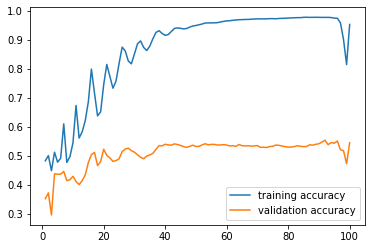

Best epoch number is:  91
The hightest validation accuracy is:  0.5536193
At the same epoch, the training accuracy is:  0.97721857


In [100]:
import matplotlib.pyplot as plt
epoch=list(range(1,epochs+1))
plt.figure()
plt.plot(epoch,tr_losses,label='training accuracy')
plt.plot(epoch,te_losses,label='validation accuracy')
plt.legend()
plt.show()

print("Best epoch number is: ", te_losses.index(max(te_losses)))
print("The hightest validation accuracy is: ", max(te_losses))
print("At the same epoch, the training accuracy is: ", tr_losses[te_losses.index(max(te_losses))])

###Gradient Boosting Classifier 




In [ ]:
GBoost = GradientBoostingClassifier(n_estimators=3000,learning_rate=0.05,max_depth=3,max_features='sqrt',
                                          min_samples_leaf=15,min_samples_split=10)
GBoost.fit(x_train_diag,y_train_diag)
scores = cross_val_score(GBoost, x_train_diag, y_train_diag, cv=5)
print('Training Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))
y_validation_pred = GBoost.predict(x_val_diag)
acc = accuracy_score(y_validation_pred,y_val_diag)
print('Validation Accuracy: %0.2f (+/- %0.2f)' % (acc.mean(), acc.std()*2))

Training Accuracy: 0.84 (+/- 0.07)
Validation Accuracy: 0.73 (+/- 0.00)


In [103]:
cn_cls,mci_cls,ad_cls,cn_pred,mci_pred,ad_pred = transform(y_val_diag,y_validation_pred)
metrics('CN_Diag',GBoost,x_val,cn_cls,cn_pred)
print('*'*30)
metrics('MCI_Diag',GBoost,x_val,mci_cls,mci_pred)
print('*'*30)
metrics('AD_Diag',GBoost,x_val,ad_cls,ad_pred)

CN_Diag Accuracy: 84.67% 
CN_Diag Precision: 84.20% 
CN_Diag Recall: 72.36% 
CN_Diag AUC: 26.11% 
******************************
MCI_Diag Accuracy: 77.52% 
MCI_Diag Precision: 74.89% 
MCI_Diag Recall: 72.66% 
MCI_Diag AUC: 79.98% 
******************************
AD_Diag Accuracy: 77.66% 
AD_Diag Precision: 44.21% 
AD_Diag Recall: 59.12% 
AD_Diag AUC: 38.55% 
